# TF-IDF + Multiple classifiers

In this notebook we will try to get the embeddings of the texts of IMDB dataset and then use a specific classification technique to classify these reviews into their corresponding sentiment i.e ***Negative*** or ***Positive***.

In [41]:
from tqdm.notebook import tqdm
import pandas as pd
tqdm.pandas()
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import string
from nltk.corpus import stopwords
import xgboost as xgb
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

sw=set(stopwords.words('english'))
snow=SnowballStemmer('english')
from sklearn import metrics
from sklearn import model_selection
sns.set(rc={'axes.facecolor':'#FAF7CC',"axes.edgecolor":"black","axes.grid":False,"axes.labelsize":30,"xtick.labelsize":15,"ytick.labelsize":15})

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/dhiab/nltk_data'
    - '/home/dhiab/anaconda3/nltk_data'
    - '/home/dhiab/anaconda3/share/nltk_data'
    - '/home/dhiab/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [33]:
df = pd.read_csv("./data/IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


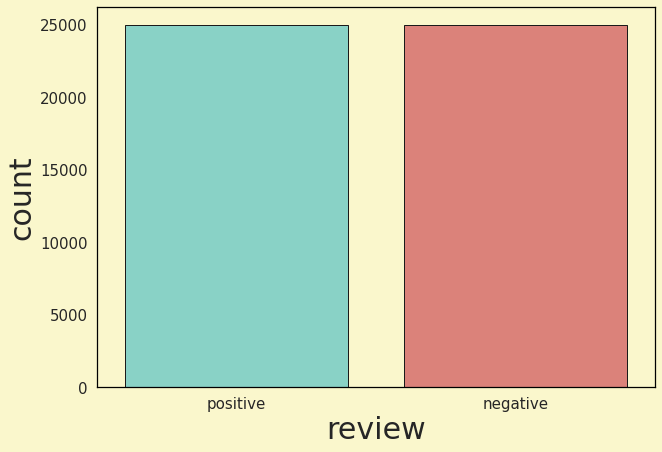

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize = (10, 7),facecolor='#FAF7CC')
sns.countplot(x="sentiment",data=df,palette=["#7DDECE", "#EB746A"],edgecolor="k")
plt.xlabel('review')
plt.show()

In [37]:
#clean text
def clean_text(text):
    #Removing html tags
    soup=BeautifulSoup(text)
    text=soup.get_text()
    #lowercase every letter
    text=text.lower()
    text = text.split() #split by all white spaces
    
    #join tokens by single space, this will remove all kinds of weird spaces
    text = " ".join(text)
    #removes all punctuation using regex and string module
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    
    return text

df['review'] = df["review"].apply(clean_text)


In [40]:
df.review.iloc[1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'